In [2]:
#pip install --upgrade scikit-learn

In [3]:
import pandas as pd
import numpy as pn
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

from sklearn.datasets import make_classification
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.utils import resample
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, chi2


In [49]:
Weather_focus=pd.read_csv("Weather Data2.csv")
Weather_focus.head()

,Day,Month,Year,Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1,1,2012,0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1,1,2012,1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1,1,2012,2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1,1,2012,3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1,1,2012,4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [5]:
df=Weather_focus.join(Weather_focus.pop('Weather').str.split(',',expand=True)) 
Weather_focus_melted = pd.melt(df,id_vars=['Day','Month','Year','Time','Temp_C','Dew Point Temp_C','Rel Hum_%', 'Wind Speed_km/h',	'Visibility_km','Press_kPa'],value_name='weather_').dropna()
Weather_focus_melted_grouped = Weather_focus_melted.replace(['Moderate Rain Showers', 'Freezing Drizzle','Rain Showers','Heavy Rain Showers', 'Heavy Rain Showers', 'Ice Pellets', 
                'Moderate Rain', 'Freezing Rain', 'Drizzle', 'Blowing Snow', 'Snow Grains', 'Snow Pellets','Moderate Snow', 'Snow Showers', 
                'Freezing Fog', 'Mostly Cloudy', 'Mainly Clear'],['Rain','Rain','Rain','Rain','Rain','Rain','Rain','Rain','Rain', 'Snow',
                                                                  'Snow','Snow','Snow','Snow', 'Fog', 'Cloudy', 'Clear'])


In [6]:
Weather_focus_melted.head()

,Day,Month,Year,Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,variable,weather_
0,1,1,2012,0:00,-1.8,-3.9,86,4,8.0,101.24,0,Fog
1,1,1,2012,1:00,-1.8,-3.7,87,4,8.0,101.24,0,Fog
2,1,1,2012,2:00,-1.8,-3.4,89,7,4.0,101.26,0,Freezing Drizzle
3,1,1,2012,3:00,-1.5,-3.2,88,6,4.0,101.27,0,Freezing Drizzle
4,1,1,2012,4:00,-1.5,-3.3,88,7,4.8,101.23,0,Fog


In [7]:
Weather_focus_melted_grouped.head()

,Day,Month,Year,Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,variable,weather_
0,1,1,2012,0:00,-1.8,-3.9,86,4,8.0,101.24,0,Fog
1,1,1,2012,1:00,-1.8,-3.7,87,4,8.0,101.24,0,Fog
2,1,1,2012,2:00,-1.8,-3.4,89,7,4.0,101.26,0,Rain
3,1,1,2012,3:00,-1.5,-3.2,88,6,4.0,101.27,0,Rain
4,1,1,2012,4:00,-1.5,-3.3,88,7,4.8,101.23,0,Fog


In [8]:
Weather_focus_melted_grouped=Weather_focus_melted_grouped.drop('variable',axis=1)

In [ ]:
Weather_focus_melted_grouped=Weather_focus_melted_grouped.drop(['Year'],axis=1)

In [ ]:
Weather_focus_melted_grouped=Weather_focus_melted_grouped.drop(['Time'],axis=1)

In [9]:
Weather_focus_melted_grouped['weather_'].unique()


array(['Fog', 'Rain', 'Cloudy', 'Clear', 'Snow', 'Haze', 'Thunderstorms'],
      dtype=object)

In [12]:
Weather_focus_melted_grouped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9183 entries, 0 to 26115
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Day               9183 non-null   int64  
 1   Month             9183 non-null   int64  
 2   Time              9183 non-null   object 
 3   Temp_C            9183 non-null   float64
 4   Dew Point Temp_C  9183 non-null   float64
 5   Rel Hum_%         9183 non-null   int64  
 6   Wind Speed_km/h   9183 non-null   int64  
 7   Visibility_km     9183 non-null   float64
 8   Press_kPa         9183 non-null   float64
 9   weather_          9183 non-null   object 
dtypes: float64(4), int64(4), object(2)
memory usage: 789.2+ KB


In [13]:
Weather_focus_melted_grouped.isnull().sum()

Day                 0
Month               0
Time                0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
weather_            0
dtype: int64

In [14]:
Weather_focus_melted_grouped.head()

,Day,Month,Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,weather_
0,1,1,0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1,1,1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1,1,2:00,-1.8,-3.4,89,7,4.0,101.26,Rain
3,1,1,3:00,-1.5,-3.2,88,6,4.0,101.27,Rain
4,1,1,4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [15]:
# searching fro empty rows
L = Weather_focus_melted_grouped.index[Weather_focus_melted_grouped.isna().all(axis=1)].tolist()
L

[]

In [16]:
Weather_focus_melted_grouped.duplicated().sum()

28

In [17]:
Weather_focus_melted_grouped.shape

(9183, 10)

In [18]:
Weather_focus_melted_grouped.describe()

,Day,Month,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,9183.000000,9183.000000,9183.000000,9183.000000,9183.000000,9183.000000,9183.000000,9183.000000
mean,15.773821,6.579658,8.612316,2.582489,68.461287,15.024828,26.755091,101.023149
std,8.814796,3.489934,11.594674,10.786003,17.279368,8.730259,13.095163,0.852590
min,1.000000,1.000000,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,8.000000,4.000000,0.100000,-5.700000,56.000000,9.000000,24.100000,100.530000
50%,16.000000,7.000000,8.800000,3.200000,69.000000,13.000000,25.000000,101.050000
75%,23.000000,10.000000,18.600000,11.700000,83.000000,20.000000,25.000000,101.560000
max,31.000000,12.000000,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


<AxesSubplot:xlabel='count', ylabel='weather_'>

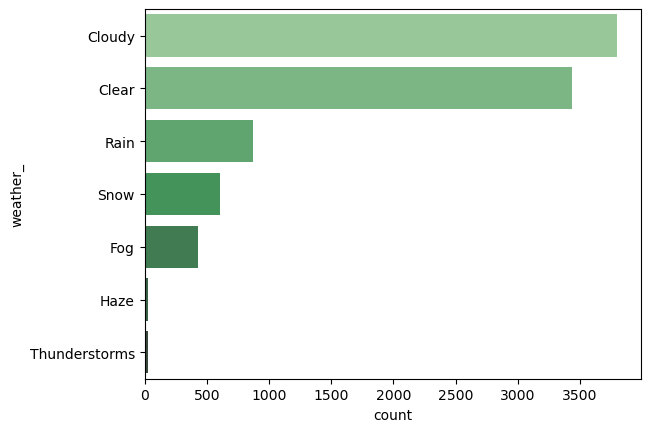

In [19]:
sns.countplot(y="weather_", data=Weather_focus_melted_grouped, palette="Greens_d",
              order=Weather_focus_melted_grouped.weather_.value_counts().iloc[:12].index)

In [20]:
Weather_focus_melted_grouped['weather_']

0         Fog
1         Fog
2        Rain
3        Rain
4         Fog
         ... 
26093    Rain
26111     Fog
26112     Fog
26114     Fog
26115     Fog
Name: weather_, Length: 9183, dtype: object

weather_
Clear            10.343823
Cloudy            9.389334
Fog               4.915962
Haze             -1.224138
Rain              9.026037
Snow             -4.145364
Thunderstorms    20.225926
Name: Temp_C, dtype: float64


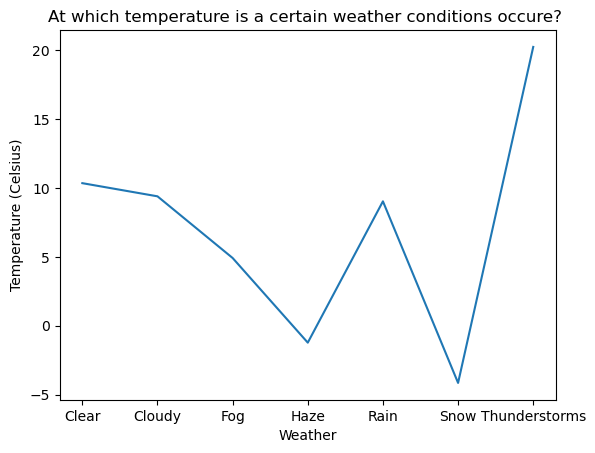

weather_
Clear             2.846008
Cloudy            2.787411
Fog               3.797418
Haze             -3.951724
Rain              6.469585
Snow             -7.010265
Thunderstorms    17.748148
Name: Dew Point Temp_C, dtype: float64


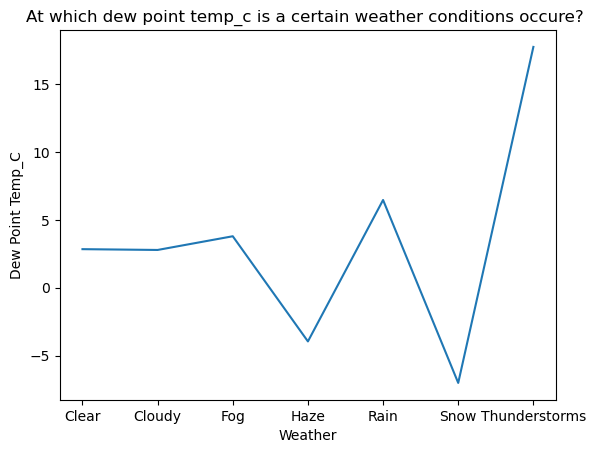

weather_
Clear            62.147145
Cloudy           65.511193
Fog              92.521127
Haze             81.724138
Rain             84.885945
Snow             80.887417
Thunderstorms    86.074074
Name: Rel Hum_%, dtype: float64


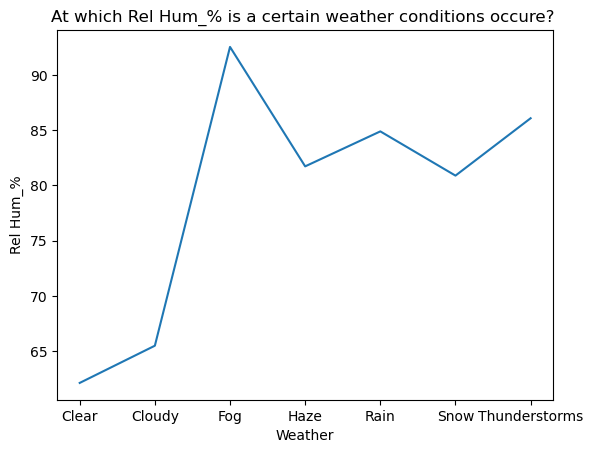

weather_
Clear            12.758741
Cloudy           15.956545
Fog              12.086854
Haze              9.413793
Rain             17.368664
Snow             20.932119
Thunderstorms    16.925926
Name: Wind Speed_km/h, dtype: float64


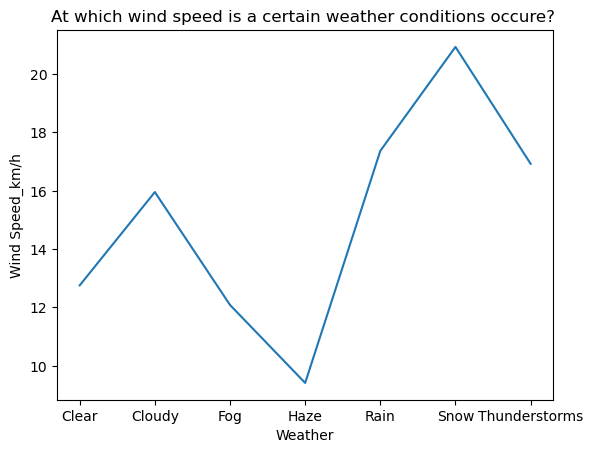

In [21]:
monthly_temp = Weather_focus_melted_grouped.groupby("weather_")["Temp_C"].mean()
print(monthly_temp)

#The results are similar to 'Month vs Visibility_km' and 'Month vs Press_kPa'
monthly_temp.plot(kind="line")
plt.xlabel("Weather")
plt.ylabel("Temperature (Celsius)")
plt.title("At which temperature is a certain weather conditions occure? ")
plt.show()

monthly_temp = Weather_focus_melted_grouped.groupby("weather_")["Dew Point Temp_C"].mean()
print(monthly_temp)

#The results are similar to 'Month vs Visibility_km' and 'Month vs Press_kPa'
monthly_temp.plot(kind="line")
plt.xlabel("Weather")
plt.ylabel("Dew Point Temp_C")
plt.title("At which dew point temp_c is a certain weather conditions occure? ")
plt.show()


monthly_temp = Weather_focus_melted_grouped.groupby("weather_")["Rel Hum_%"].mean()
print(monthly_temp)

#The results are similar to 'Month vs Visibility_km' and 'Month vs Press_kPa'
monthly_temp.plot(kind="line")
plt.xlabel("Weather")
plt.ylabel("Rel Hum_%")
plt.title("At which Rel Hum_% is a certain weather conditions occure? ")
plt.show()

monthly_temp = Weather_focus_melted_grouped.groupby("weather_")["Wind Speed_km/h"].mean()
print(monthly_temp)

#The results are similar to 'Month vs Visibility_km' and 'Month vs Press_kPa'
monthly_temp.plot(kind="line")
plt.xlabel("Weather")
plt.ylabel("Wind Speed_km/h")
plt.title("At which wind speed is a certain weather conditions occure? ")
plt.show()

In [22]:
# labelencoder = LabelEncoder()
# # Assigning numerical values and storing in another column
# Weather_focus_melted_grouped['Weather'] = labelencoder.fit_transform(Weather_focus_melted_grouped['Weather'])

# Weather_focus_melted_grouped.head()

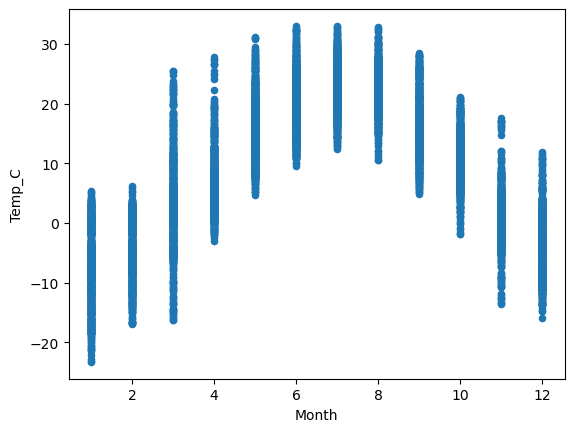

In [47]:
r2=Weather_focus_melted_grouped.plot.scatter("Month","Temp_C")

<Figure size 1200x1000 with 0 Axes>

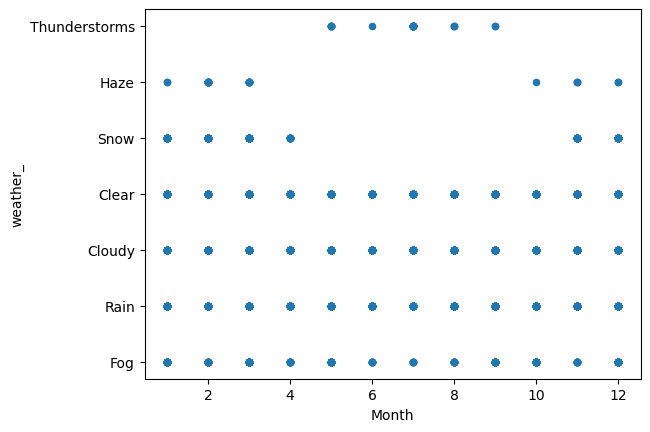

In [24]:
plt.figure(figsize=(12,10))
r=Weather_focus_melted_grouped.plot.scatter("Month","weather_")

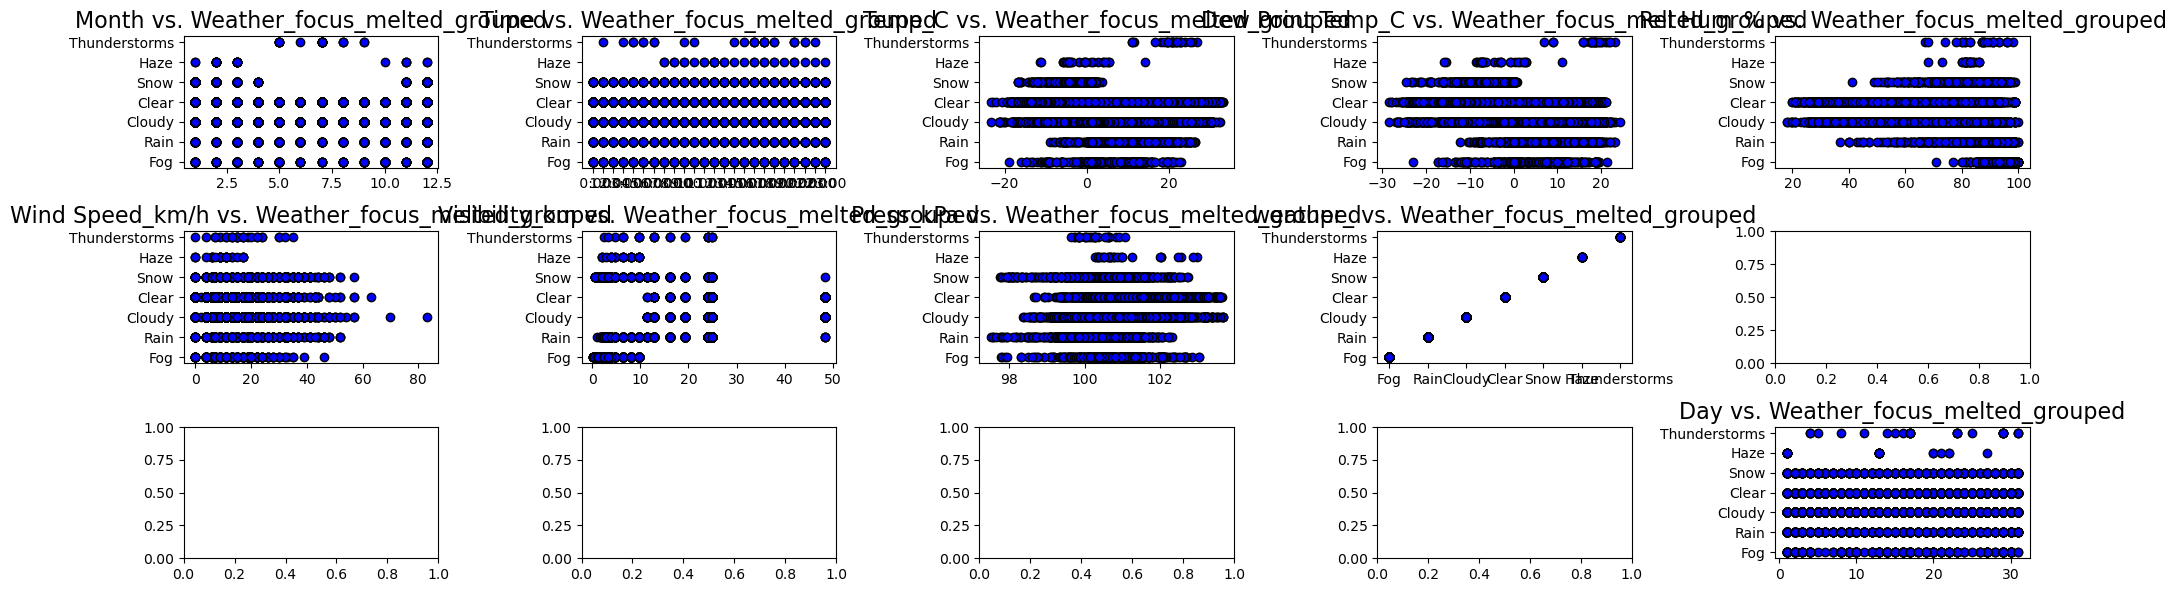

In [25]:
fig, axs = plt.subplots(3,5, figsize=(20,6),)
fig.subplots_adjust(hspace = 0.5, wspace=.2)
axs = axs.ravel()

for index, column in enumerate(Weather_focus_melted_grouped.columns):
    axs[index-1].set_title("{} vs. Weather_focus_melted_grouped".format(column),fontsize=16)
    axs[index-1].scatter(x=Weather_focus_melted_grouped[column],y=Weather_focus_melted_grouped['weather_'],color='blue',edgecolor='k')

fig.tight_layout(pad=1)

In [26]:
#print("unique Temp_C",Weather_focus['Temp_C'].value_counts().unique())
print("sum of unique Temp_C ",Weather_focus_melted_grouped['Temp_C'].value_counts().unique().sum())

#print("unique Dew Point Temp_C",Weather_focus['Dew Point Temp_C'].value_counts().unique())
print("sum of unique Dew Point Temp_C ",Weather_focus_melted_grouped['Dew Point Temp_C'].value_counts().unique().sum())

#print("unique Rel Hum_%",Weather_focus['Rel Hum_%'].value_counts().unique())
print("sum of unique Rel Hum_% ",Weather_focus_melted_grouped['Rel Hum_%'].value_counts().unique().sum())

#print("unique Wind Speed_km/h",Weather_focus['Wind Speed_km/h'].value_counts().unique())
print("sum of unique Wind Speed_km/h ",Weather_focus_melted_grouped['Wind Speed_km/h'].value_counts().unique().sum())

#print("unique Visibility_km",Weather_focus['Visibility_km'].value_counts().unique())
print("sum of unique Visibility_km ",Weather_focus_melted_grouped['Visibility_km'].value_counts().unique().sum())

#print("unique Press_kPa",Weather_focus['Press_kPa'].value_counts().unique())
print("sum of unique Press_kPa ",Weather_focus_melted_grouped['Press_kPa'].value_counts().unique().sum())

sum of unique Temp_C  1350
sum of unique Dew Point Temp_C  1378
sum of unique Rel Hum_%  7656
sum of unique Wind Speed_km/h  9167
sum of unique Visibility_km  9183
sum of unique Press_kPa  1729


Month
1     -7.210622
2     -4.174721
3      3.071282
4      6.955116
5     16.025508
6     20.094650
7     22.755774
8     22.262069
9     16.357392
10    10.897580
11     0.933148
12    -2.948832
Name: Temp_C, dtype: float64


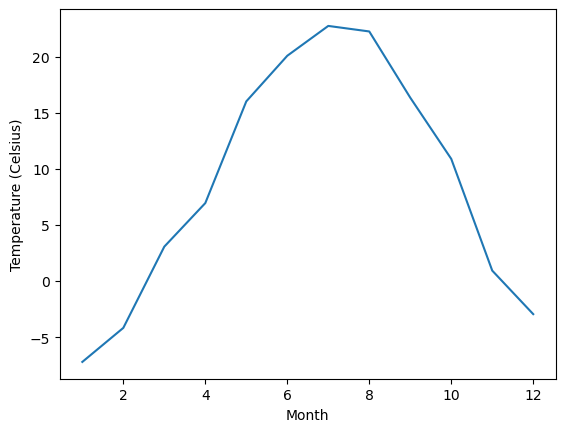

Month
1     -7.210622
2     -4.174721
3      3.071282
4      6.955116
5     16.025508
6     20.094650
7     22.755774
8     22.262069
9     16.357392
10    10.897580
11     0.933148
12    -2.948832
Name: Temp_C, dtype: float64


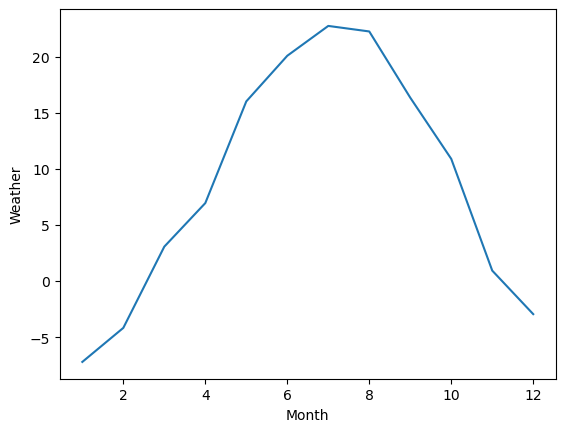

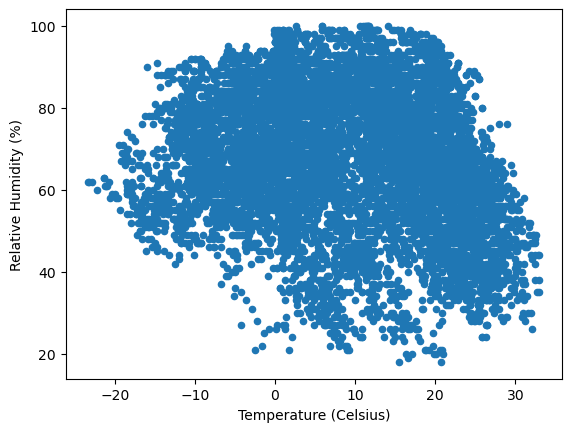

In [44]:
monthly_temp = Weather_focus_melted_grouped.groupby("Month")["Temp_C"].mean()
print(monthly_temp)

#The results are similar to 'Month vs Visibility_km' and 'Month vs Press_kPa'
monthly_temp.plot(kind="line")
plt.xlabel("Month")
plt.ylabel("Temperature (Celsius)")
plt.show()



monthly_weather = Weather_focus_melted_grouped.groupby("Month")["weather_"]
print(monthly_temp)


#The results are similar to 'Month vs Visibility_km' and 'Month vs Press_kPa '
monthly_temp.plot(kind="line")
plt.xlabel("Month")
plt.ylabel("Weather")
plt.show()



Weather_focus_melted_grouped.plot(x="Temp_C", y="Rel Hum_%", kind="scatter")
plt.xlabel("Temperature (Celsius)")
plt.ylabel("Relative Humidity (%)")
plt.show()





# plt.figure(figsize=(12,10))

# sns.countplot(y = 'weather_',data = Weather_focus_melted_grouped)
# plt.xlabel("Count",fontweight='bold',size=14)
# plt.ylabel("Weather Condition",fontweight='bold',size=14)
# plt.title("occurrance(times) of weather conditions")
# plt.show()

Day
1      7.714286
2      8.800990
3      8.957931
4      8.894771
5      7.838966
6      7.607612
7      8.866897
8      8.779299
9      8.329392
10     8.206731
11     7.021034
12     9.029795
13     9.305333
14     8.303145
15     8.420068
16     8.394737
17     9.497476
18     9.389262
19     9.037658
20    10.061246
21    10.321753
22    10.187541
23     9.960535
24     9.329655
25     8.563265
26     7.194863
27     6.593506
28     7.666212
29     7.153526
30     8.484211
31     9.336207
Name: Temp_C, dtype: float64


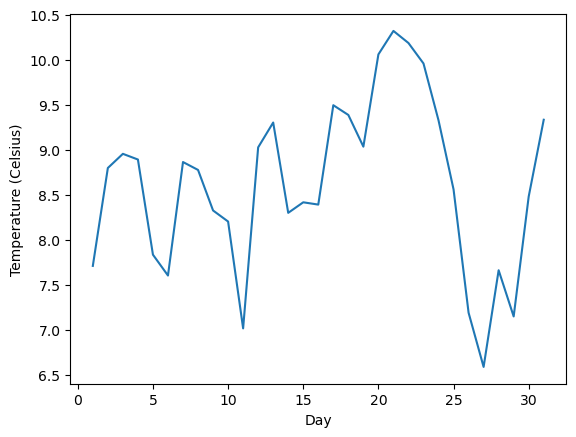

             Day     Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
Month                                                                       
1      16.073834  -7.210622        -12.041451  68.937824        18.221503   
2      14.892458  -4.174721         -9.094274  69.398045        14.807263   
3      15.928205   3.071282         -3.282821  66.147436        14.375641   
4      15.641201   6.955116         -1.864802  56.698499        17.478854   
5      15.609137  16.025508          8.220939  63.262690        12.746193   
6      15.462277  20.094650         11.774074  60.964335        14.672154   
7      16.090551  22.755774         14.711024  62.666667        12.028871   
8      15.942971  22.262069         15.692838  68.236074        14.035809   
9      15.856183  16.357392         10.791263  71.944892        14.158602   
10     15.750318  10.897580          6.669682  76.756688        15.338854   
11     15.484050   0.933148         -4.175173  69.995839        13.977809   

/var/folders/xz/_xfhll016vg_b609flfpk_7w0000gr/T/ipykernel_4280/3133856389.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_data = Weather_focus_melted_grouped.groupby('Month').mean()


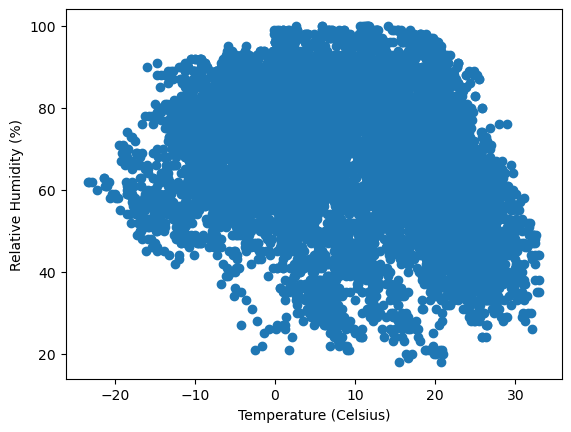

Month
1     -7.210622
2     -4.174721
3      3.071282
4      6.955116
5     16.025508
6     20.094650
7     22.755774
8     22.262069
9     16.357392
10    10.897580
11     0.933148
12    -2.948832
Name: Temp_C, dtype: float64


In [45]:
monthly_temp = Weather_focus_melted_grouped.groupby("Day")["Temp_C"].mean()
print(monthly_temp)

#The results are similar to 'Month vs Visibility_km' and 'Month vs Press_kPa'
monthly_temp.plot(kind="line")
plt.xlabel("Day")
plt.ylabel("Temperature (Celsius)")
plt.show()

monthly_data = Weather_focus_melted_grouped.groupby('Month').mean()
print(monthly_data)



plt.scatter(Weather_focus_melted_grouped['Temp_C'], Weather_focus_melted_grouped['Rel Hum_%'])
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Relative Humidity (%)')
plt.show()

monthly_temp = Weather_focus_melted_grouped.groupby("Month")["Temp_C"].mean()
print(monthly_temp)

#The results are similar to 'Month vs Visibility_km' and 'Month vs Press_kPa'
# monthly_temp.plot(kind="line")
# plt.xlabel("Month")
# plt.ylabel("Temperature (Celsius)")
# plt.show()

# print("correlation ",Weather_focus_melted_grouped.corr())




2012 unique Recorded wind speed: [ 4  7  6  9 15 13 20 22 19 24 30 35 39 32 33 26 44 43 48 37 28 17 11  0
 83 70 57 46 41 52 50 63 54  2]
Max Wind Speed: 83
Min Wind Speed: 0
Average Wind Speed: 15.024828487422411


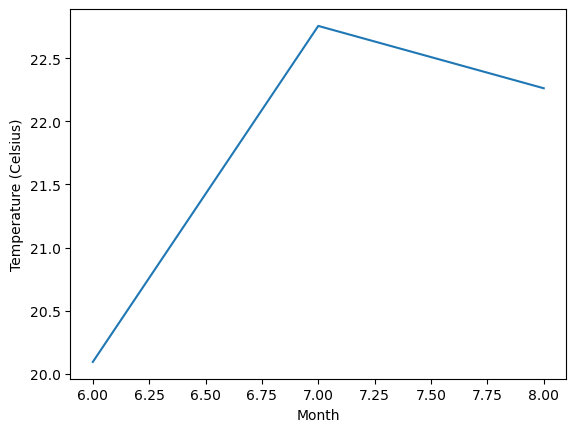

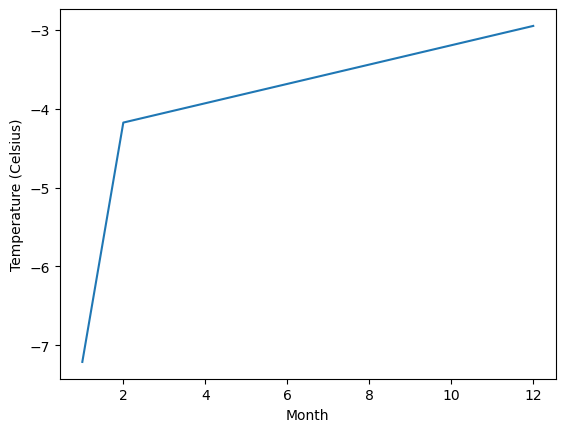

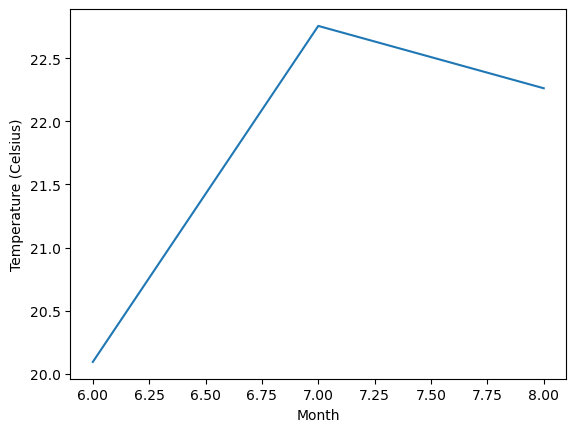

Months with  Fog [ 1  2  3  4  5  7  8  9 10 11 12  6]
Months with  Rain [ 1  2  3  4  5  6  7  8  9 10 11 12]
Months with  Cloudy [ 1  2  3  4  5  6  7  8  9 10 11 12]
Months with  Clear [ 1  2  3  4  5  6  7  8  9 10 11 12]
Months with  Snow [ 1  2  3  4 11 12]
Months with  Haze [ 1  2  3 10 11 12]
Months with  Thunderstorms [5 6 7 8 9]


In [54]:
#find all unique wind speed recorded in 2021
d=Weather_focus_melted_grouped['Wind Speed_km/h'].unique()
print('2012 unique Recorded wind speed:',d)

max_wind= Weather_focus_melted_grouped['Wind Speed_km/h'].max()
print('Max Wind Speed:',max_wind)

min_wind= Weather_focus_melted_grouped['Wind Speed_km/h'].min()
print('Min Wind Speed:',min_wind)

avg_wind= Weather_focus_melted_grouped['Wind Speed_km/h'].mean()
print('Average Wind Speed:',avg_wind)

#winter weather
Winter = Weather_focus_melted_grouped[(Weather_focus_melted_grouped['Month']==6) | (Weather_focus_melted_grouped['Month']==7) | (Weather_focus_melted_grouped['Month']==8)]
Winter

mvst = Winter.groupby("Month")["Temp_C"].mean()

#The results are similar to 'Month vs Visibility_km' and 'Month vs Press_kPa'
mvst.plot(kind="line")
plt.xlabel("Month")
plt.ylabel("Temperature (Celsius)")
plt.show()

#Summer Weather 
Summer= Weather_focus_melted_grouped[(Weather_focus_melted_grouped['Month']==12) | (Weather_focus_melted_grouped['Month']==1) | (Weather_focus_melted_grouped['Month']==2)]
Summer

Sum_Vis = Summer.groupby("Month")["Temp_C"].mean()
Sum_Vis.plot(kind="line")
plt.xlabel("Month")
plt.ylabel("Temperature (Celsius)")
plt.show()

Spring= Weather_focus_melted_grouped[(Weather_focus_melted_grouped['Month']==9) | (Weather_focus_melted_grouped['Month']==10) | (Weather_focus_melted_grouped['Month']==11)]
Spring

Spring_Vis = Winter.groupby("Month")["Temp_C"].mean()
Spring_Vis.plot(kind="line")
plt.xlabel("Month")
plt.ylabel("Temperature (Celsius)")
plt.show()

Uni_weather=Weather_focus_melted_grouped['weather_'].unique()

for values in Uni_weather:

  Weather_Cond=Weather_focus_melted_grouped[(Weather_focus_melted_grouped['weather_']  == values)]
  Val=Weather_Cond['Month'].unique()
  print('Months with ',values,Val)


/var/folders/xz/_xfhll016vg_b609flfpk_7w0000gr/T/ipykernel_4280/3411832444.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sb.heatmap(Weather_focus_melted_grouped.corr(), cmap="YlGnBu", annot=True)


                    Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
Temp_C            1.000000          0.930534  -0.227757        -0.069560   
Dew Point Temp_C  0.930534          1.000000   0.137573        -0.099882   
Rel Hum_%        -0.227757          0.137573   1.000000        -0.078795   
Wind Speed_km/h  -0.069560         -0.099882  -0.078795         1.000000   
Visibility_km     0.282028          0.046556  -0.664787        -0.006830   
Press_kPa        -0.211746         -0.305551  -0.256859        -0.356373   

                  Visibility_km  Press_kPa  
Temp_C                 0.282028  -0.211746  
Dew Point Temp_C       0.046556  -0.305551  
Rel Hum_%             -0.664787  -0.256859  
Wind Speed_km/h       -0.006830  -0.356373  
Visibility_km          1.000000   0.262534  
Press_kPa              0.262534   1.000000  


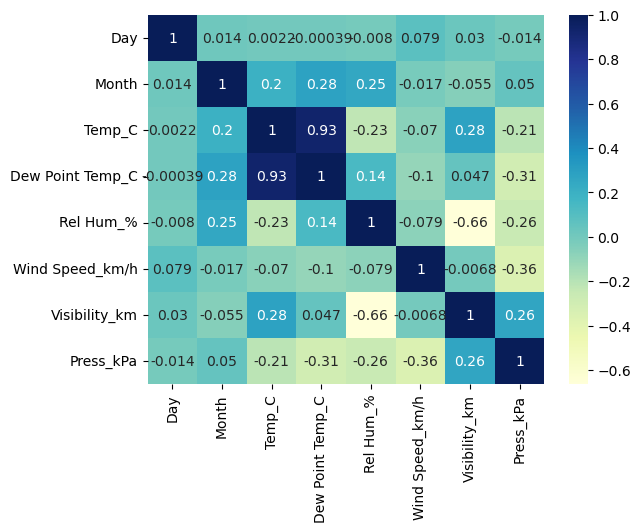

In [43]:
import seaborn as sb
# plotting correlation heatmap
dataplot = sb.heatmap(Weather_focus_melted_grouped.corr(), cmap="YlGnBu", annot=True)

print(Weather_focus_melted_grouped[["Temp_C", "Dew Point Temp_C", "Rel Hum_%", "Wind Speed_km/h", "Visibility_km", "Press_kPa"]].corr())

In [30]:
# import seaborn as sns
# plt.figure(figsize=(18,6))
# sns.pairplot(Weather_focus_melted_grouped.drop('Time',axis=1),hue='Weather')
# plt.show()

In [31]:
order=Weather_focus_melted_grouped.weather_.value_counts().iloc[:12].index
for values in order:

  Weather_Cond=Weather_focus[(Weather_focus_melted_grouped['weather_']  == values)]
  Val=Weather_Cond['Month'].unique()
  print('Months with ',values,Val)

Months with  Cloudy [ 1  2  3  4  5  6  7  8  9 10 11 12]
Months with  Clear [ 1  2  3  4  5  6  7  8  9 10 11 12]
Months with  Rain [ 1  2  3  4  5  6  7  8  9 10 11 12]
Months with  Snow [ 1  2  3  4 11 12]
Months with  Fog [ 1  2  3  4  5  7  8  9 10 11 12]
Months with  Haze [ 1  2  3 10 11 12]
Months with  Thunderstorms [5 6 7 8 9]


/var/folders/xz/_xfhll016vg_b609flfpk_7w0000gr/T/ipykernel_4280/2304808990.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Weather_Cond=Weather_focus[(Weather_focus_melted_grouped['weather_']  == values)]


In [32]:
order

Index(['Cloudy', 'Clear', 'Rain', 'Snow', 'Fog', 'Haze', 'Thunderstorms'], dtype='object')

##MODEL

In [33]:
Weather_focus_melted_grouped.head()

,Day,Month,Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,weather_
0,1,1,0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1,1,1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1,1,2:00,-1.8,-3.4,89,7,4.0,101.26,Rain
3,1,1,3:00,-1.5,-3.2,88,6,4.0,101.27,Rain
4,1,1,4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [34]:
# labelencoder = LabelEncoder()
# # Assigning numerical values and storing in another column
# Weather_focus_melted_grouped['weather_'] = labelencoder.fit_transform(Weather_focus_melted_grouped['weather_'])

# Weather_focus_melted_grouped.head()

In [36]:
#Split train and target features
X=Weather_focus_melted_grouped.drop('weather_',axis=1)
y=Weather_focus_melted_grouped['weather_']

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=123)
# # Create the Logistic Regression model
# lr = RandomForestClassifier()

# # Fit the model on the training data
# lr.fit(X_train, y_train)

# # Make predictions on the test data
# y_pred = lr.predict(X_test)

# # Calculate the accuracy of the model
# acc = accuracy_score(y_test, y_pred)
# print("Accuracy:", acc)





In [42]:
# # #defining the dataset
# X,y= make_classification(n_samples = 9000,n_classes=7,n_informative=16,scale=2.0)

# #class destribution

print(Counter(y))

Counter({'Cloudy': 3797, 'Clear': 3432, 'Rain': 868, 'Snow': 604, 'Fog': 426, 'Haze': 29, 'Thunderstorms': 27})


In [38]:
# # instantiating the random undersampler
# rus = RandomUnderSampler() 
# # resampling X, y
# X_rus, y_rus = rus.fit_resample(X, y)
# # new class distribution
# print(Counter(y_rus))

In [39]:
# instantiating the random over sampler 
from imblearn.over_sampling import SMOTE
ros = SMOTE(random_state=123)
# resampling X, y
X_ros, y_ros = ros.fit_resample(X, y)
# new class distribution 
print(Counter(y_ros))
# # Counter({0: 9844, 1: 9844})

Counter({'Fog': 3797, 'Rain': 3797, 'Cloudy': 3797, 'Clear': 3797, 'Snow': 3797, 'Haze': 3797, 'Thunderstorms': 3797})


In [40]:
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Define the pipeline
# pipe = make_pipeline(KNeighborsClassifier(n_neighbors=8,weights='uniform',n_jobs=16))#KNeighborsClassifier(n_neighbors=5))#DecisionTreeClassifier())#RandomForestClassifier())#DecisionTreeClassifier()
pipe = make_pipeline(StandardScaler(),RandomForestClassifier(n_estimators=10,random_state=123,criterion='entropy'))
# np.random.seed(42)
pipe.fit(X_ros, y_ros)

y_pred = pipe.predict(X_train)
y_pred
y_pred1 = pipe.predict(X_test)
y_pred1
X_ros

,Day,Month,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
0,1,1,-1.800000,-3.900000,86,4,8.000000,101.240000
1,1,1,-1.800000,-3.700000,87,4,8.000000,101.240000
2,1,1,-1.800000,-3.400000,89,7,4.000000,101.260000
3,1,1,-1.500000,-3.200000,88,6,4.000000,101.270000
4,1,1,-1.500000,-3.300000,88,7,4.800000,101.230000
...,...,...,...,...,...,...,...,...
26574,9,7,23.880676,21.464671,86,22,16.185360,100.591464
26575,29,5,20.897324,17.465775,80,14,10.795210,99.780803
26576,17,7,20.476777,19.183589,92,15,3.675540,99.956502
26577,29,5,20.888254,17.462751,80,14,10.891955,99.783524


In [41]:
print('training set ',classification_report(y_train,y_pred))
print('test set ',classification_report(y_test,y_pred1))


training set                 precision    recall  f1-score   support

        Clear       0.99      0.99      0.99      2574
       Cloudy       0.99      0.99      0.99      2869
          Fog       0.69      0.71      0.70       323
         Haze       0.81      0.81      0.81        21
         Rain       0.82      0.81      0.81       625
         Snow       0.91      0.91      0.91       456
Thunderstorms       0.47      0.42      0.44        19

     accuracy                           0.95      6887
    macro avg       0.81      0.81      0.81      6887
 weighted avg       0.95      0.95      0.95      6887

test set                 precision    recall  f1-score   support

        Clear       0.99      1.00      0.99       858
       Cloudy       1.00      0.99      0.99       928
          Fog       0.60      0.65      0.62       103
         Haze       0.67      0.75      0.71         8
         Rain       0.83      0.79      0.81       243
         Snow       0.88      0.90   